# Machine Learning 0 - Introduction

In this lab, we will introduce the classification problem that we will be working on for the last three labs. The objectives of the lab are:

* Examine the dataset and prepare the basic pipeline that will be used in the next lab.
* Make sure that we use a correct methodology for comparing the algorithms
* Get used to working with the [scikit-learn](https://scikit-learn.org/stable/) library.

## Important note

For the machine learning labs, **each student must write a report** (one report for all labs together) which will be used during the oral exam. This report should highlight the different methods used during the labs, but also how you validated each method and compared their results.

## Introduction to the dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has been collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60.000 32x32 colour images, split in 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

*Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.* PDF available at https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

For the purpose of the INFO-H-501 laboratories, we will use a subset of those images by only taking 3 different classes: 'airplane', 'bird' and 'horse'.

[Click here to download](https://my.pcloud.com/publink/show?code=XZJUCPkZqiVxqtn8CXRB7D78YKt88RJvzWyk) the modified dataset. Extract the ZIP file and put the CIFAR10 folder in the same directory as the notebook.

The images are 32x32 8-bit **RGB**, and from these we extracted **Histogram of Gradient** vectors (16 orientations x 16 blocks = 256 values in HoG vector).

The following code pre-loads all of this data (make sure that you have the [lab_tools.py](https://github.com/odebeir/info-h-500-501/blob/master/LABS1/lab_tools.py) file in the same directory as the notebook, if you didn't clone the repository):

In [2]:
from lab_tools import CIFAR10, get_hog_image

Pre-loading training data
Pre-loading test data


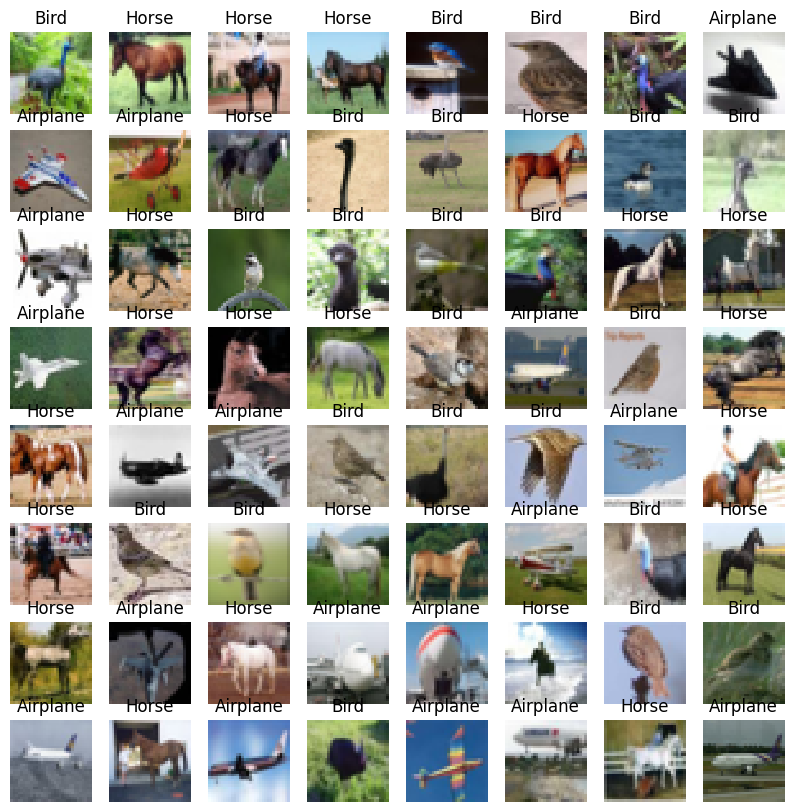

In [3]:
dataset = CIFAR10('./CIFAR10/')
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

We can also have a look at some HoG images:

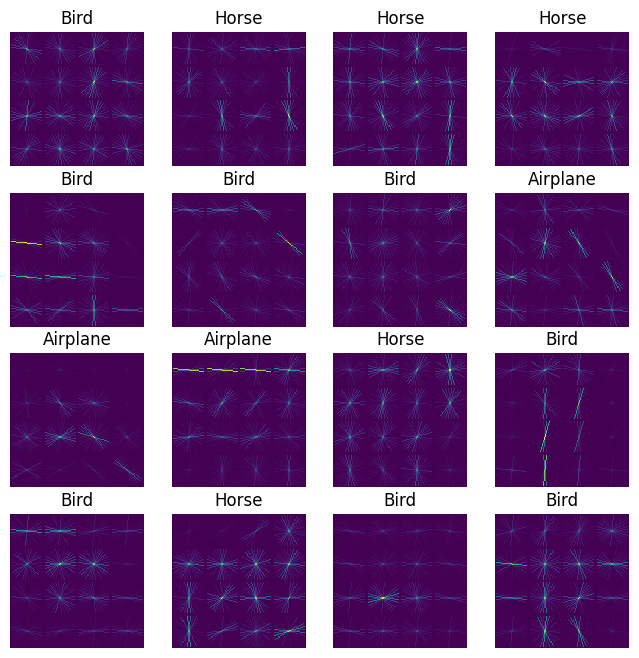

In [4]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    hog = dataset.train['hog'][i].reshape((4,4,16))
    plt.imshow(get_hog_image(hog, 128), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

Note that this is an "image" representation of the HoG, but that the actual data that we will be working on is a size 256 vector for each image. Our **feature space** has therefore 256 dimensions. 

## Exploring the dataset

The *dataset* object gives you access to different attributes:

* *dataset.path* contains the path to the CIFAR10 folder.
* *dataset.labels* contains the name of the three classes
* *dataset.train* and *dataset.test* are dictionaries containing three numpy arrays each:
    * *images* contains the RGB images
    * *hog* contains the HoG vectors
    * *labels* contains the label for each image

In [5]:
print(dataset.path)
print(dataset.labels)
print(dataset.train.keys())
print(dataset.train['hog'].shape)

./CIFAR10/
['Airplane', 'Bird', 'Horse']
dict_keys(['images', 'hog', 'labels'])
(15000, 256)


### Quick questions:

The dataset has already been split into a training set (dataset.train) and a test set (dataset.test).

* How many images are in the training set ?
* How many images are in the test set ?
* What is the class distribution of the dataset ?

In [7]:
# -- Your code here -- #
number_img_train = len(dataset.train["images"])
number_img_test = len(dataset.test["images"])
dico_distribution_dataset_train = {}
dico_distribution_dataset_test = {}

for label in dataset.train["labels"]:
    label_name = dataset.labels[label]
    if label_name in dico_distribution_dataset_train:
        dico_distribution_dataset_train[label_name] += 1
    else:
        dico_distribution_dataset_train[label_name] = 1

for label in dataset.test["labels"]:
    label_name = dataset.labels[label]
    if label_name in dico_distribution_dataset_test:
        dico_distribution_dataset_test[label_name] += 1
    else:
        dico_distribution_dataset_test[label_name] = 1


print(f"Number of sample in dataset training: {number_img_train}")
print(f"Number of sample in dataset testing: {number_img_test}")
print(f"Distribution classes training: {dico_distribution_dataset_train}")
print(f"Distribution classes testin: {dico_distribution_dataset_test}")


Number of sample in dataset training: 15000
Number of sample in dataset testing: 3000
Distribution classes training: {'Bird': 5000, 'Horse': 5000, 'Airplane': 5000}
Distribution classes testin: {'Airplane': 1000, 'Horse': 1000, 'Bird': 1000}


### Descriptive data analysis

Look at the HoG data from the training set. What are the characteristics of the dataset ? Do you think that some pre-processing may be required to help with the different algorithms ?

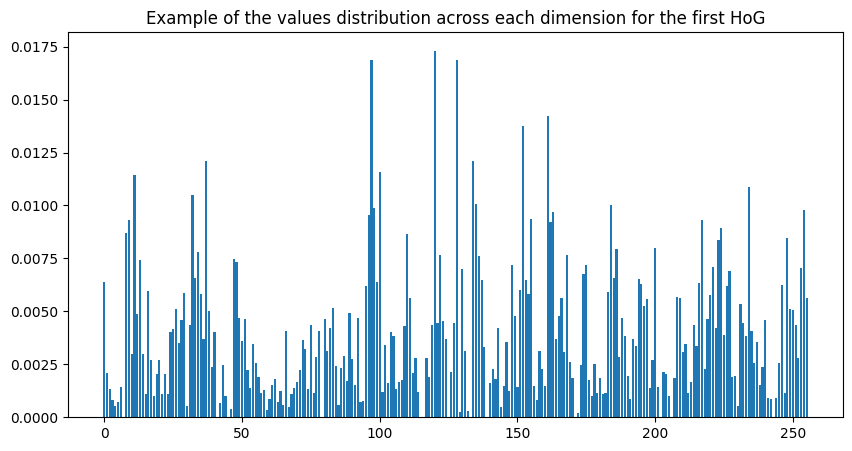

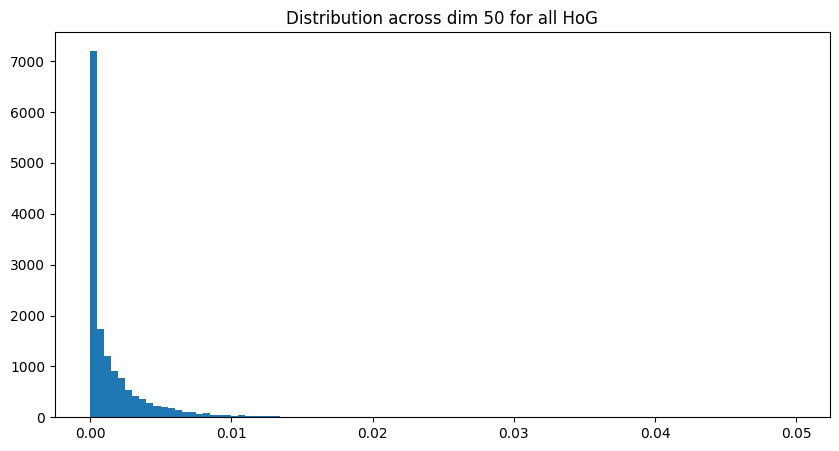

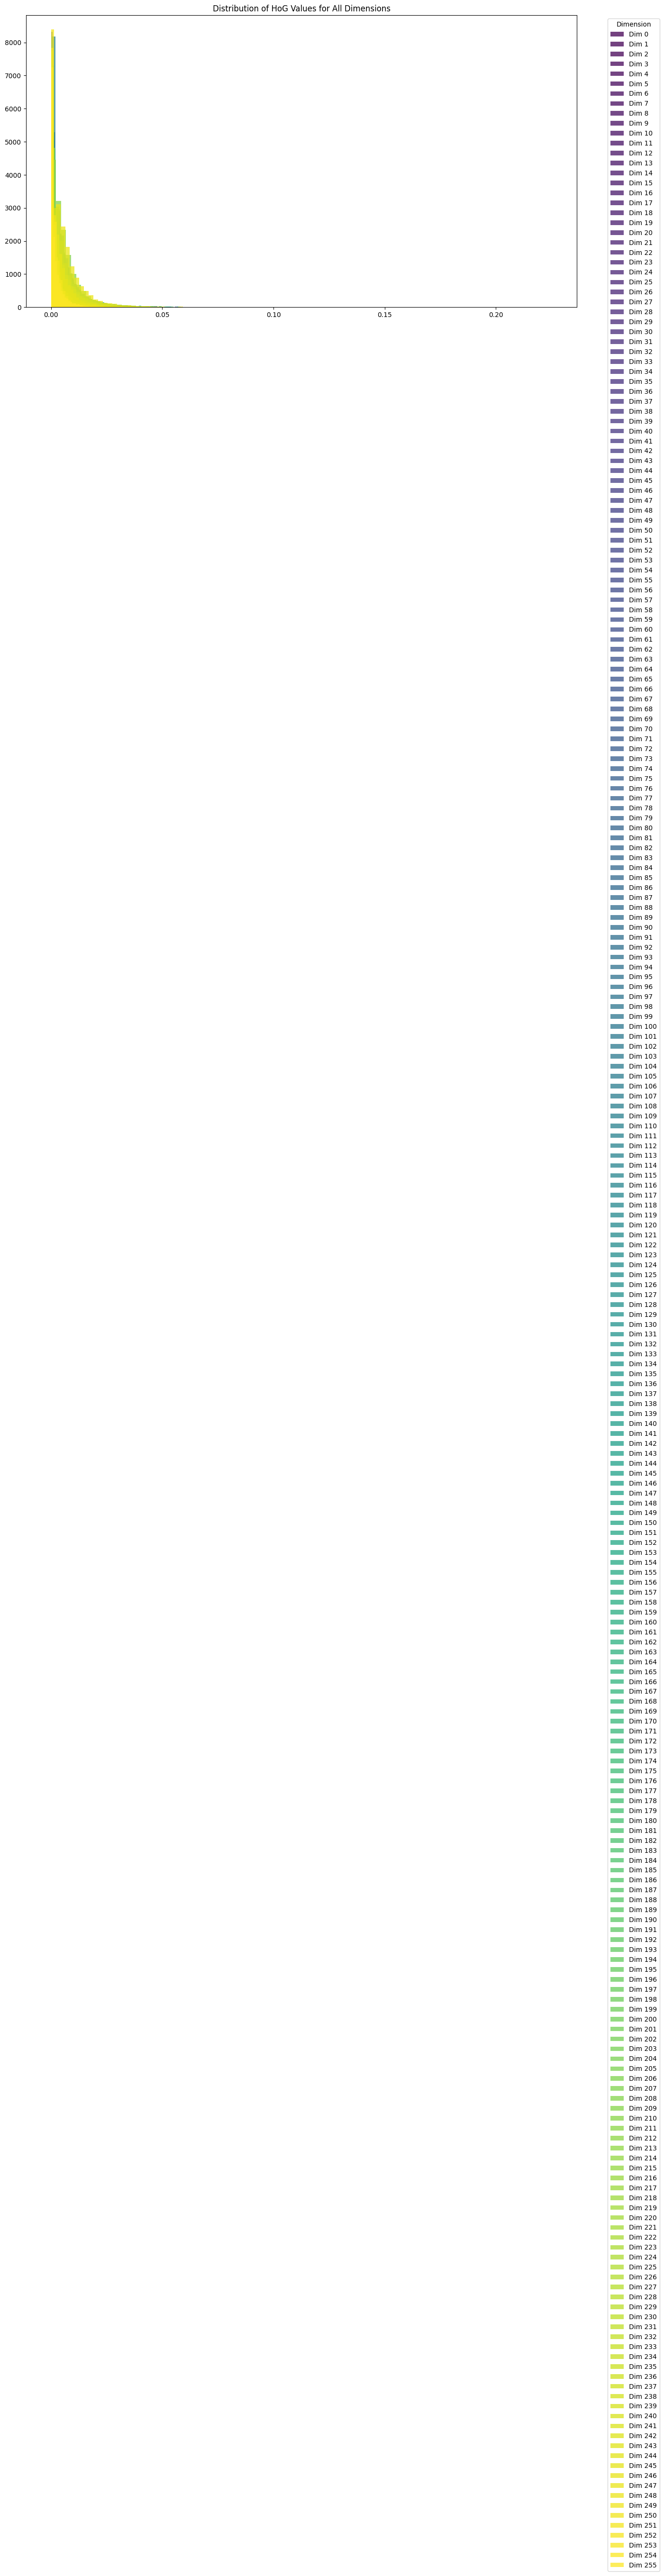

In [8]:
# -- Your code here -- #
import numpy as np
import matplotlib.pyplot as plt

#Print 1 example vector to see what it looks like
first_ex_hog = dataset.train["hog"][0]
#print(first_ex_hog)

#Check shape distribution 
shape_dico = {}
for value in dataset.train["hog"]:
    shape_key = str(value.shape[0])
    if shape_key in shape_dico:
        shape_dico[shape_key] += 1
    else:
        shape_dico[shape_key] = 1
#print(f"Distrubtion vector shape: {shape_dico}") #Result OK 

#Check presence of "NaN" values
number_nan = 0
for hog in dataset.train["hog"]:
    for value in hog: 
        if np.isnan(value):
            number_nan += 1
#print(f"Number of NaN values: {number_nan}") #Result OK

#Check value distribution for each dimension - Example of the value distrubtion for one HoG
plt.figure(figsize=(10,5))
plt.title("Example of the values distribution across each dimension for the first HoG")
plt.bar(range(256), first_ex_hog)
plt.show()

#Check value distribution for one specifique dimension
dim_check = 50
plt.figure(figsize=(10,5))
plt.title(f"Distribution across dim {dim_check} for all HoG")
plt.hist(dataset.train["hog"][:, dim_check], bins=100)
plt.show()

#Check value distribution for all dimension
num_dimensions = 256

plt.figure(figsize=(15, 8)) 
plt.title('Distribution of HoG Values for All Dimensions')

colors = plt.cm.viridis(np.linspace(0, 1, num_dimensions))

for dim in range(num_dimensions):
    dim_values = dataset.train["hog"][:, dim]
    plt.hist(dim_values, bins=100, color=colors[dim], alpha=0.75, label=f'Dim {dim}')

plt.legend(title='Dimension', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

#Check the correlation between variables to diminish the dimensionnality ??

## Introduction to scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a very well documented machine learning library in Python. It contains many algorithms for [classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), and makes the whole process of building a machine learning pipeline relatively straightforward. There are many examples in the documentation, as well as relatively complete theoretical explanations, so I really encourage you to take the time to read it if some things are not clear.

Let's make a very simple example. We are going to use the [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), which is a very basic linear model.

In [9]:
from sklearn.linear_model import RidgeClassifier

To use a classifier with scikit-image, we generally have three steps:

* Create an instance of the class of the classifier (here: RidgeClassifier). The constructor will generally contain many arguments that can be modified, and that are explained in the documentation. There will also generally be default values for all of them, so in this simple example we will just use those:

In [38]:
clf = RidgeClassifier() #alpha=1

* Use the *fit* method with, as arguments, the training data (in our case, the HoG vectors) and the corresponding labels. This will start the main training algorithm, trying to fit the parameters of the classifier with the training data:

In [39]:
clf.fit(dataset.train['hog'], dataset.train['labels'])

RidgeClassifier()

* Use the *predict* method to get the prediction of the classifier on the data given as argument. In this case, we get the predictions on the data that was just used for training. **What kind of performance will that give us?**

In [40]:
pred = clf.predict(dataset.train['hog'])
print(pred.shape)

(15000,)


We can then evaluate those predictions. Scikit-learn provides many different [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) for evaluating the performances of a classifier. The most simple of those is the accuracy, which is simply the number of correct predictions divided by the total number of predictions:

In [41]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dataset.train['labels'], pred)
print(score)

# Not that it's fairly easy to compute that score "by hand":
T = (pred==dataset.train['labels']).sum()
print(T, len(pred), T/len(pred))

0.7356666666666667
11035 15000 0.7356666666666667


In a multiclass problem, it's often also very useful to look at the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), which gives us more information on which classes are often mistaken for each other:

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

[[3812  740  448]
 [ 742 3236 1022]
 [ 337  676 3987]]


Note that the rows represent the **true labels** and the columns the **predicted labels**. So this mean that, in this case, out of the 5000 images of class 0 ("Airplane"), 3812 were correctly classified, 740 were classified as "Bird" and 448 as "Horse").

### Quick question

* Modify the code to estimate the **predictive** performance of the algorithm (without using the test set).

In [18]:
# -- Your code here -- #
#We need to use the cross-validation, meaning that we have to split the dataset into a training and a validation set
#Note that it is always good to shuffle the data before splitting it
split_val = 0.1
len_dataset = int(split_val*len(dataset.train["hog"]))

train_X = dataset.train["hog"][:-len_dataset]
train_Y = dataset.train["labels"][:-len_dataset]

val_X = dataset.train["hog"][-len_dataset:]
val_Y = dataset.train["labels"][-len_dataset:]

print(f"Shape train_X: {train_X.shape}")
print(f"Shape train_Y: {train_Y.shape}")
print(f"Shape val_X: {val_X.shape}")
print(f"Shape val_Y: {val_Y.shape}")


Shape train_X: (13500, 256)
Shape train_Y: (13500,)
Shape val_X: (1500, 256)
Shape val_Y: (1500,)


In [21]:
clf = RidgeClassifier(alpha=0.1)
clf.fit(train_X, train_Y)

pred = clf.predict(train_X)
score = accuracy_score(train_Y, pred)
print(f"Descriptive {score}") #Descriptive based on the training data

pred = clf.predict(val_X)
score = accuracy_score(val_Y, pred)
print(f"Predictive {score}") #Predictive based on the testing/validation data

cm = confusion_matrix(val_Y, pred)
print(cm)

Descriptive 0.7562222222222222
Predictive 0.742
[[405  65  42]
 [ 67 330  93]
 [ 34  86 378]]


## How can we find the "best" algorithm?

What we have shown above served to illustrate how scikit-learn classifiers work, but we now have to build a valid machine learning pipeline to compare the different algorithms that we will use in the next labs.

As we have said earlier, we have already split the dataset into a "training" and a "test" set. It is clear that the final evaluation should take place on the test set.

But in addition to comparing the algorithms between each other, we also have to find the best "hyper-parameters" for each algorithm. For example, in our RidgeClassifier example, there is a regularization parameters, *alpha*, which by default was set to 1.0. Can we improve the performance of the algorithm by modifying this parameter ?

### Side-note: parameter vs hyper-parameter

In general, when talking about machine learning models, **parameters** are what the algorithm learns with the data (if we are for instance learning a linear regression y = ax+b, the "parameters" would be a and b), while **hyper-parameters** are modifiers to the model or to the pipeline (for instance, if we are generalizing to a polynomial regression, the degree of the polynome would be an hyper-parameter).

### Cross-validation

The most common way of finding the best hyper-parameters of a classifier is to use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

* Using the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method from scikit-learn, find the best *alpha* hyper-parameter for the RidgeClassifier: 

In [34]:
# -- Your code here -- #
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

X, y = dataset.train["hog"], dataset.train["labels"]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

alpha_value = 0
best_mean = 0
best_alpha = None

while alpha_value < 1:
    clf = RidgeClassifier(alpha=alpha_value)
    score_cross = cross_val_score(clf, X, y, cv=skf)
    mean = np.mean(score_cross)
    if mean > best_mean:
        best_mean = mean 
        best_alpha = alpha_value
    alpha_value += 0.01 

print(f"Best model obtained using alpha {best_alpha} with a mean accuracy of {best_mean}") #Best one is 0.04


/Users/xavierdekeme/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.95114e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/xavierdekeme/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.0808e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best model obtained using alpha 0.04 with a mean accuracy of 0.7476666666666667


### Comparing algorithms

Once you have found the best hyper-parameters for an algorithm, you can re-train the classifier on the whole training set, and finally use the test set to get a "final performance". 

* How can you then decide which of the classifiers is best ?
* How can you decide if the different between two classifiers is significant ?

Try to compare the best RidgeClassifier with the original. Is it significantly better?

In [45]:
# -- Your code here -- #
#Choose the simplest one that give the best results
clf_best_alpha = RidgeClassifier(alpha=0.04)
clf_best_alpha.fit(dataset.train["hog"], dataset.train["labels"])

pred = clf_best_alpha.predict(dataset.test["hog"])
score = accuracy_score(dataset.test["labels"], pred)
print(f"Predictive best alpha model {score}") #Predictive based on the testing/validation data

cm = confusion_matrix(dataset.test["labels"], pred)
print(cm)


pred = clf.predict(dataset.test["hog"])
score = accuracy_score(dataset.test["labels"], pred)
print(f"Predictive original model {score}") #Predictive based on the testing/validation data

cm = confusion_matrix(dataset.test["labels"], pred)
print(cm)

#Comparison number of parameters
coefficients_best = clf_best_alpha.coef_
intercept_best = clf_best_alpha.intercept_
num_parameters = coefficients_best.size + intercept_best.size
print("Number parameters best alpha total :", num_parameters)

coefficients_ori = clf.coef_
intercept_ori = clf.intercept_
num_parameters = coefficients_ori.size + intercept_ori.size
print("Number parameters original total :", num_parameters)

Predictive best alpha model 0.7436666666666667
[[766 158  76]
 [124 672 204]
 [ 51 156 793]]
Predictive original model 0.729
[[753 174  73]
 [136 650 214]
 [ 67 149 784]]
Number parameters best alpha total : 771
Number parameters original total : 771
